# <center> Implementation of Rainfall Prediction System along with XAI </center>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("cleaned_data.csv")
data

,Unnamed: 0,Day,Month,Year,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,AvgTemp,AvgPressure,RainToday,RainTomorrow
0,0,1,12,2008,2,13.4,22.9,0.6,6.484195,7.001431,...,20.0,24.0,71.0,22.0,8.000000,5.121202,19.35,1007.400000,0.0,0.0
1,1,2,12,2008,2,7.4,25.1,0.0,6.278940,11.029074,...,4.0,22.0,44.0,25.0,1.853901,2.553898,20.75,1009.200000,0.0,0.0
2,2,3,12,2008,2,12.9,25.7,0.0,8.681495,11.784566,...,19.0,26.0,38.0,30.0,2.016364,2.000000,22.10,1008.150000,0.0,0.0
3,3,4,12,2008,2,9.2,28.0,0.0,6.777574,11.395051,...,11.0,9.0,45.0,16.0,1.236367,2.068572,22.30,1015.200000,0.0,0.0
4,4,5,12,2008,2,17.5,32.3,1.0,7.437996,5.751086,...,7.0,20.0,82.0,33.0,7.000000,8.000000,23.75,1008.400000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227161,227161,4,3,2013,14,20.7,27.5,6.8,6.185046,5.580597,...,33.0,43.0,79.0,80.0,6.338185,6.432727,24.30,1014.200000,1.0,1.0
227162,227162,1,9,2008,15,7.3,13.7,0.0,3.400000,5.700000,...,35.0,28.0,48.0,48.0,7.000000,2.000000,11.80,1005.500000,0.0,1.0
227163,227163,31,8,2014,46,7.8,15.4,0.4,2.578476,5.302987,...,7.0,13.0,76.0,53.0,5.047853,5.214282,14.05,1020.150000,0.0,1.0
227164,227164,9,7,2014,38,5.7,21.7,0.0,2.600000,9.400000,...,11.0,28.0,48.0,17.0,0.000000,1.000000,16.70,1003.400000,0.0,1.0


In [3]:
data = data.drop(data.columns[0], axis=1)

In [4]:
data

,Day,Month,Year,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,AvgTemp,AvgPressure,RainToday,RainTomorrow
0,1,12,2008,2,13.4,22.9,0.6,6.484195,7.001431,13,...,20.0,24.0,71.0,22.0,8.000000,5.121202,19.35,1007.400000,0.0,0.0
1,2,12,2008,2,7.4,25.1,0.0,6.278940,11.029074,14,...,4.0,22.0,44.0,25.0,1.853901,2.553898,20.75,1009.200000,0.0,0.0
2,3,12,2008,2,12.9,25.7,0.0,8.681495,11.784566,15,...,19.0,26.0,38.0,30.0,2.016364,2.000000,22.10,1008.150000,0.0,0.0
3,4,12,2008,2,9.2,28.0,0.0,6.777574,11.395051,4,...,11.0,9.0,45.0,16.0,1.236367,2.068572,22.30,1015.200000,0.0,0.0
4,5,12,2008,2,17.5,32.3,1.0,7.437996,5.751086,13,...,7.0,20.0,82.0,33.0,7.000000,8.000000,23.75,1008.400000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227161,4,3,2013,14,20.7,27.5,6.8,6.185046,5.580597,9,...,33.0,43.0,79.0,80.0,6.338185,6.432727,24.30,1014.200000,1.0,1.0
227162,1,9,2008,15,7.3,13.7,0.0,3.400000,5.700000,7,...,35.0,28.0,48.0,48.0,7.000000,2.000000,11.80,1005.500000,0.0,1.0
227163,31,8,2014,46,7.8,15.4,0.4,2.578476,5.302987,11,...,7.0,13.0,76.0,53.0,5.047853,5.214282,14.05,1020.150000,0.0,1.0
227164,9,7,2014,38,5.7,21.7,0.0,2.600000,9.400000,13,...,11.0,28.0,48.0,17.0,0.000000,1.000000,16.70,1003.400000,0.0,1.0


### <center> Hybrid Model Training: (Random Forest + Catboost) </center>

In [5]:
from sklearn.model_selection import train_test_split


X = data.drop("RainTomorrow", axis = 1)
y = data['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score
import time

catboost_model = CatBoostClassifier(verbose=False)
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)
catboost_pred_proba = catboost_model.predict_proba(X_test)[:, 1]

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

hybrid_pred_proba = (catboost_pred_proba + rf_pred_proba) / 2

hybrid_preds = (hybrid_pred_proba > 0.5).astype(int)

hybrid_accuracy = accuracy_score(y_test, hybrid_preds)
hybrid_roc_auc = roc_auc_score(y_test, hybrid_pred_proba)
hybrid_kappa = cohen_kappa_score(y_test, hybrid_preds)


print("Hybrid Model 1 Metrics (Random Forest + CatBoost):")
print("Accuracy:", hybrid_accuracy)
print("ROC AUC:", hybrid_roc_auc)
print("Cohen's Kappa:", hybrid_kappa)

Hybrid Model 1 Metrics (Random Forest + CatBoost):
Accuracy: 0.9440507109213364
ROC AUC: 0.9879385249960249
Cohen's Kappa: 0.8880541076166569


In [7]:
mean_values = data.mean().to_dict()

def predict_rain_tomorrow(input_data):
    # Convert input data to pandas DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Make predictions using your trained model
    catboost_pred_proba = catboost_model.predict_proba(input_df)[:, 1]
    rf_pred_proba = rf_classifier.predict_proba(input_df)[:, 1]
    
    # Take the average of predictions from both models
    hybrid_pred_proba = (catboost_pred_proba + rf_pred_proba) / 2
    
    # Convert probabilities to binary predictions
    predictions = (hybrid_pred_proba > 0.5).astype(int)
    
    return predictions

# Take user input
user_input = {}
for feature in ["Day","Month","Year", "Location", "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", 
                "WindGustDir", "WindGustSpeed", "WindDir9am", "WindDir3pm", "WindSpeed9am", 
                "WindSpeed3pm", "Humidity9am", "Humidity3pm",  "Cloud9am", 
                "Cloud3pm", "AvgTemp", "AvgPressure", "RainToday"]:
    default_value = mean_values.get(feature, 0)  # Get the mean value for the feature
    value = input(f"Enter {feature} [default value: {default_value}]: ") or default_value  # Use the mean value if no input provided
    user_input[feature] = float(value)

# Make prediction
prediction = predict_rain_tomorrow(user_input)
print("Predicted Rain Tomorrow:", prediction)

Enter Day [default value: 15.74823257001488]: 15
Enter Month [default value: 6.417734167965277]: 6
Enter Year [default value: 2012.7417571291478]: 2012
Enter Location [default value: 23.753506246533373]: 23
Enter MinTemp [default value: 12.54552806419349]: 12
Enter MaxTemp [default value: 22.456678901766796]: 22
Enter Rainfall [default value: 3.679344389032738]: 3
Enter Evaporation [default value: 4.757212250967476]: 4
Enter Sunshine [default value: 6.294209311887572]: 6
Enter WindGustDir [default value: 8.470004314025866]: 8
Enter WindGustSpeed [default value: 41.90559689131243]: 41
Enter WindDir9am [default value: 7.99977109250504]: 8
Enter WindDir3pm [default value: 8.103457383587333]: 8
Enter WindSpeed9am [default value: 14.585467262713447]: 14
Enter WindSpeed3pm [default value: 19.178270600392906]: 19
Enter Humidity9am [default value: 72.21214728510651]: 72
Enter Humidity3pm [default value: 57.810346090457514]: 57
Enter Cloud9am [default value: 4.986573604744728]: 5
Enter Cloud3pm

## <center> Implementing LIME XAI model </center>


In [8]:
from lime import lime_tabular

# Initialize the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, discretize_continuous=True)

def explain_prediction(input_data):
    # Convert input data to numpy array
    input_np = np.array([list(input_data.values())])
    
    # Explain the prediction using LIME
    explanation = explainer.explain_instance(input_np[0], rf_classifier.predict_proba)
    
    # Get feature importances from LIME explanation
    importances_dict = dict(explanation.as_list())
    
    # Convert feature importances to human-readable format
    human_readable_explanations = []
    for feature, importance in importances_dict.items():
        feature_desc = f'"{feature}"'
        if feature.startswith('<='):
            feature_desc += f' with values less than or equal to {feature[2:]}'
        elif feature.startswith('>'):
            feature_desc += f' with values greater than {feature[1:]}'
        else:
            ranges = feature.split(' <= ')
            if len(ranges) == 2:
                feature_desc += f' with values between {ranges[0]} and {ranges[1]}'
        if importance > 0:
            human_readable_explanations.append(f"{feature_desc} seems to have a positive impact.")
        else:
            human_readable_explanations.append(f"{feature_desc} seems to have a negative impact.")
    
    return human_readable_explanations

# Take user input
user_input = {}
for feature in ["Day","Month","Year", "Location", "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", 
                "WindGustDir", "WindGustSpeed", "WindDir9am", "WindDir3pm", "WindSpeed9am", 
                "WindSpeed3pm", "Humidity9am", "Humidity3pm",  "Cloud9am", 
                "Cloud3pm", "AvgTemp", "AvgPressure", "RainToday"]:
    default_value = mean_values.get(feature, 0)  # Get the mean value for the feature
    value = input(f"Enter {feature} [default value: {default_value}]: ") or default_value  # Use the mean value if no input provided
    user_input[feature] = float(value)

# Make prediction
prediction = predict_rain_tomorrow(user_input)
print("Predicted Rain Tomorrow:", prediction)

# Explain prediction using LIME
explanations = explain_prediction(user_input)
print("\nHuman-Readable LIME Feature Importances:")
for explanation in explanations:
    print(explanation)

Enter Day [default value: 15.74823257001488]: 15
Enter Month [default value: 6.417734167965277]: 6
Enter Year [default value: 2012.7417571291478]: 2012
Enter Location [default value: 23.753506246533373]: 23
Enter MinTemp [default value: 12.54552806419349]: 12
Enter MaxTemp [default value: 22.456678901766796]: 22
Enter Rainfall [default value: 3.679344389032738]: 3
Enter Evaporation [default value: 4.757212250967476]: 4
Enter Sunshine [default value: 6.294209311887572]: 6
Enter WindGustDir [default value: 8.470004314025866]: 8
Enter WindGustSpeed [default value: 41.90559689131243]: 41
Enter WindDir9am [default value: 7.99977109250504]: 7
Enter WindDir3pm [default value: 8.103457383587333]: 8
Enter WindSpeed9am [default value: 14.585467262713447]: 14
Enter WindSpeed3pm [default value: 19.178270600392906]: 19
Enter Humidity9am [default value: 72.21214728510651]: 72
Enter Humidity3pm [default value: 57.810346090457514]: 57
Enter Cloud9am [default value: 4.986573604744728]: 5
Enter Cloud3pm

C:\Users\sulik\miniconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Human-Readable LIME Feature Importances:
"3.34 < Sunshine <= 6.30" with values between 3.34 < Sunshine and 6.30 seems to have a positive impact.
"43.00 < Humidity3pm <= 59.00" with values between 43.00 < Humidity3pm and 59.00 seems to have a negative impact.
"Rainfall > 2.20" seems to have a positive impact.
"3.28 < Cloud3pm <= 5.72" with values between 3.28 < Cloud3pm and 5.72 seems to have a negative impact.
"1011.00 < AvgPressure <= 1015.65" with values between 1011.00 < AvgPressure and 1015.65 seems to have a positive impact.
"39.00 < WindGustSpeed <= 50.00" with values between 39.00 < WindGustSpeed and 50.00 seems to have a positive impact.
"3.00 < Cloud9am <= 5.63" with values between 3.00 < Cloud9am and 5.63 seems to have a positive impact.
"0.00 < RainToday <= 1.00" with values between 0.00 < RainToday and 1.00 seems to have a positive impact.
"13.00 < WindSpeed3pm <= 19.00" with values between 13.00 < WindSpeed3pm and 19.00 seems to have a positive impact.
"2.40 < Evaporation

## <center> Visualization of XAI Outputs: </center>

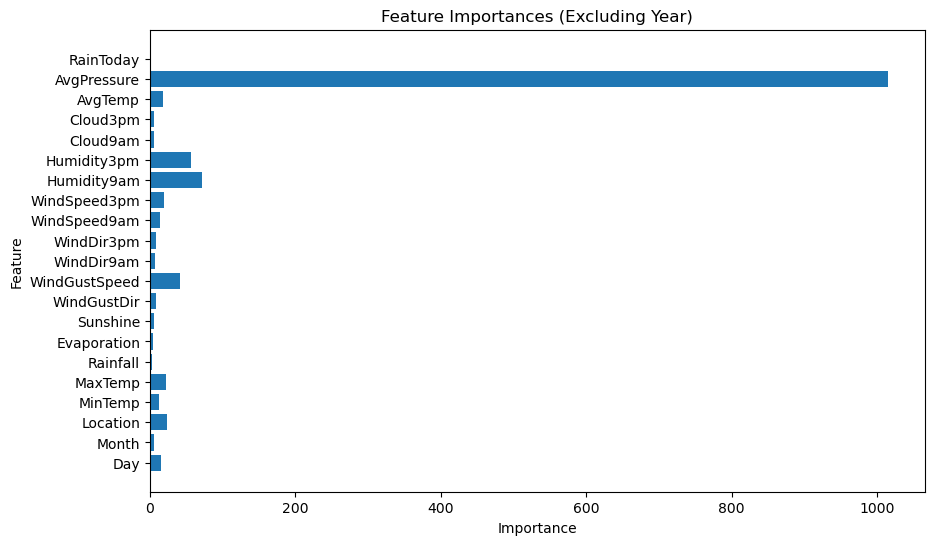

In [16]:
# Feature Importance Plots
import matplotlib.pyplot as plt

# Exclude "Year" feature from the plot
features = [feature for feature in user_input.keys() if feature != "Year"]
importance_values = [user_input[feature] for feature in features]

plt.figure(figsize=(10, 6))
plt.barh(features, importance_values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Excluding Year)')
plt.show()